Source: 

https://notebooks.quantumstat.com/

https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX

# BERT Fine-Tuning Tutorial with PyTorch

By Chris McCormick and Nick Ryan

*Revised on 3/20/20 - Switched to `tokenizer.encode_plus` and added validation loss. See [Revision History](https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=IKzLS9ohzGVu) at the end for details.*




In [1]:
import tensorflow as tf
from tqdm import tqdm

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('TensorFlow: No GPU available, using the CPU instead.')
#     raise SystemError('GPU device not found')

import torch

GPU_AVAILABLE = torch.cuda.is_available()

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('PyTorch:    No GPU available, using the CPU instead.')
    device = torch.device("cpu")
    
# GPU_AVAILABLE = False
PRE_TRAINING = False
# PRE_TRAINING = True

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


# 2. Loading OPT Dataset


## Pre-training data:

In [6]:


# import os 
# from shutil           import copyfile
# import sys 
# import wget
# sys.path.insert(0, '../')
# sys.path.insert(0, '../config/')

# from CustomTokenizer  import *
# from data_preparation import *
# from Embedder         import *
# from models           import *
# from training         import *
# from set_project_seed import *

# # pd.read_table("../../data/EmoNet/Emonet.tsv").head()

# # pd.read_table("../../data/EmoNet/Emonet.tsv").shape

# import sys  
# from shutil           import copyfile
# sys.path.insert(0, '../')
# # sys.path.insert(0, '../config/')

# # from CustomTokenizer  import *
# # from data_preparation import *

# SENTIMENT_PATH = "../../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"
# HATE_PATH      = "../../data/Hate/hatespeech-twitter.csv"
# # PRE_TRAINING_ON_TSA = True
# PRE_TRAINING_ON_TSA = False
# SENTIMENT_TEXT      = "SentimentText"
# SENTIMENT_LABEL     = "Sentiment"
# # PRE_TRAINING_ON_HATE = True
# PRE_TRAINING_ON_HATE = False
# # PRE_TRAINING_ON_EMO  = True
# PRE_TRAINING_ON_EMO  = False

# if PRE_TRAINING_ON_HATE:
#     hate_df     = pd.read_csv(HATE_PATH\
#                               , names=["ID", "Tweet", "Label"])
#     hate_df["HLabel"] = hate_df.Label.astype('category').cat.codes

#     # Get the lists of sentences and their labels.
#     # sentences = df.sentence.values
#     # labels    = df.label.values
#     sentences = hate_df.Tweet.values
#     labels    = hate_df.HLabel.values.astype(int)
# #     np.unique(labels).shape[0]
# #     hate_df.groupby("Label").count()[["Tweet"]]
# #     hate_df.head()
    
# if PRE_TRAINING_ON_TSA:
#     sent_tweets, sent_gold_labels = read_OPT_data(data_path=SENTIMENT_PATH\
#                                        , text_column=SENTIMENT_TEXT\
#                                        , label_column=SENTIMENT_LABEL)
    
#     sentences = np.array(sent_tweets)
#     labels    = np.array(sent_gold_labels)
    
# if PRE_TRAINING_ON_EMO:
#     emonet_df = pd.read_table("../../data/EmoNet/Emonet.tsv"\
#                               , names=["Tweet", "Emotion"])

# #     emonet_df.shape

# #     emonet_df.head()

#     emonet_df["ELabel"] = emonet_df.Emotion.astype('category').cat.codes

#     # Get the lists of sentences and their labels.
#     # sentences = df.sentence.values
#     # labels    = df.label.values
#     sentences = emonet_df.Tweet.values
#     labels    = emonet_df.ELabel.values.astype(int)

#     np.unique(labels).shape[0]
#     emonet_df.groupby("Emotion").count()[["Tweet"]]#Plutchik-2 Emotions
#     emonet_df.head()
#     # emonet_df../
#     # emonet_df.cc.
    
# labels

## OPT data

In [65]:
import numpy  as np
import pandas as pd

# from data_preparation import *

# opt_data_path = "../../data/optimism-twitter-data/tweets_annotation.csv"
opt_data_path = "../../data/optimism-twitter-data/processed/"

# def retrieve_logits(
opt_df_train = pd.read_csv(opt_data_path + "optimism_train.csv").drop("Unnamed: 0", axis=1)
opt_df_test  = pd.read_csv(opt_data_path + "optimism_test.csv").drop("Unnamed: 0", axis=1)
opt_df_dev   = pd.read_csv(opt_data_path + "optimism_validation.csv").drop("Unnamed: 0", axis=1)

opt_train_tweets      = np.array(opt_df_train["Tweet"])
opt_train_gold_labels = np.array(opt_df_train["AverageAnnotation"])
opt_test_tweets       = np.array(opt_df_test["Tweet"])
opt_test_gold_labels  = np.array(opt_df_test["AverageAnnotation"])
opt_dev_tweets        = np.array(opt_df_dev["Tweet"])
opt_dev_gold_labels   = np.array(opt_df_dev["AverageAnnotation"])


# opt_tweets, opt_gold_labels = read_OPT_data(data_path=opt_data_path)
# opt_gold_labels             = np.array(opt_gold_labels)
# opt_tweets                  = np.array(opt_tweets)



SETTING_1M1 = True
SETTING_1M1 = False

if SETTING_1M1:
        opt_tweets, opt_gold_labels = remove_vague_tweets(\
                                                                opt_tweets\
                                                              , opt_gold_labels)

# bin_opt_gold_labels = binarize_labels(gold_labels=(opt_gold_labels)\
#                                       , max_negative_value=0)

# x_train, y_train, x_dev, y_dev, x_test, y_test = \
#     train_dev_test_split(opt_vectorized_tweets\
#                          , bin_opt_gold_labels, R_SEED=16)

# opt_tweets[-1], opt_gold_labels[-1], bin_opt_gold_labels[-1]

# Get the lists of sentences and their labels.
# sentences = df.sentence.values
# labels    = df.label.values
sentences_train = opt_train_tweets
labels_train    = np.where(opt_train_gold_labels<=0, 0, 1)

sentences_test = opt_test_tweets
labels_test    = np.where(opt_test_gold_labels<=0, 0, 1)

sentences_dev  = opt_dev_tweets
labels_dev     = np.where(opt_dev_gold_labels<=0, 0, 1)

print(f"{labels_train.shape[0]} train samples;")
print(f"{labels_test.shape[0]} test samples;")
print(f"{labels_dev.shape[0]} validation samples.")

5939 train samples;
768 test samples;
768 validation samples.


In [3]:
# opt_df_test.drop("Unnamed: 0", axis=1)
# pd.read_csv(opt_data_path + "optimism_train.csv").drop("Unnamed: 0", axis=1)
opt_df_dev.head()

,Tweet,Username,AverageAnnotation,Original ID
0,could use any good vibes/energy for a family m...,bubafettt,1.4,370
1,@hyper_chondriac @showblzsyndrome @manubiondi ...,FooledBySecrecy,1.0,2067
2,@zaynmalik remember when we all loved you and ...,PrincessXMalik,-1.2,5106
3,@theyoungerbolt im doing pretty good. how abou...,sith_hannah_ace,1.6,1288
4,#days need to get rid of all these horrible ch...,SharonCaseFan,-1.0,1046


# 3. Tokenization & Input Formatting

In this section, we'll transform our dataset into the format that BERT can be trained on.

## 3.1. BERT Tokenizer

In [3]:
from transformers import BertTokenizer
from transformers import DistilBertTokenizer
from transformers import XLNetTokenizer
from transformers import RobertaTokenizer
from transformers import AlbertTokenizer
# from transformers import ElectraTokenizer
from transformers import AutoTokenizer

# GPU_AVAILABLE = False
# GPU_AVAILABLE = True
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
# if torch.cuda.is_available():  
if GPU_AVAILABLE:
    tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#     tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
    # tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
#     tokenizer2 = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)
    # tokenizer = XLNetTokenizer.from_pretrained('xlnet-large-cased', do_lower_case=True)
    tokenizer2 = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)
    # tokenizer = ElectraTokenizer.from_pretrained('google/electra-large-discriminator', do_lower_case=True)
#     tokenizer = AutoTokenizer.from_pretrained("ssun32/bert_base_nli_turkle")

else:
    tokenizer1 = AlbertTokenizer.from_pretrained('albert-base-v2', do_lower_case=True)
    tokenizer2 = AlbertTokenizer.from_pretrained('albert-large-v2', do_lower_case=True)
    print(f"Loaded albert-base-v2 as tokenizer1.")
    print(f"Loaded albert-large-v2 as tokenizer2.")
    

# GPU_AVAILABLE = True


Loading BERT tokenizer...


Let's apply the tokenizer to one sentence just to see the output.


In [4]:
# Print the original sentence.
print(' Original: ', sentences_train[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer1.tokenize(sentences_train[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer1.convert_tokens_to_ids(tokenizer1.tokenize(sentences_train[0])))

 Original:  @runge_kelly rest is good!! if you like tea and you have some you should try that! feel better. okay? -3-
Tokenized:  ['@', 'run', '##ge', '_', 'kelly', 'rest', 'is', 'good', '!', '!', 'if', 'you', 'like', 'tea', 'and', 'you', 'have', 'some', 'you', 'should', 'try', 'that', '!', 'feel', 'better', '.', 'okay', '?', '-', '3', '-']
Token IDs:  [1030, 2448, 3351, 1035, 5163, 2717, 2003, 2204, 999, 999, 2065, 2017, 2066, 5572, 1998, 2017, 2031, 2070, 2017, 2323, 3046, 2008, 999, 2514, 2488, 1012, 3100, 1029, 1011, 1017, 1011]


## 3.2. Required Formatting

### Special Tokens


## 3.3. Tokenize Dataset

In [5]:
# max_len     = 0
max_len1     = 0
max_len2     = 0

# For every sentence...
for sent in tqdm(sentences_train):

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids1 = tokenizer1.encode(sent, add_special_tokens=True)
    input_ids2 = tokenizer2.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len1 = max(max_len1, len(input_ids1))
    max_len2 = max(max_len2, len(input_ids2))

if PRE_TRAINING:
    if PRE_TRAINING_ON_TSA:
        print('Max Sentiment sentence length: ', max_len)
    if PRE_TRAINING_ON_EMO:
        print('Max Emotion sentence length: ', max_len)
    if PRE_TRAINING_ON_HATE:
        print('Max Hate sentence length: ', max_len)
else:
    print('Max OPT sentence length acc. to tokenizer1 is: ', max_len1)
    print('Max OPT sentence length acc. to tokenizer2 is: ', max_len2)
# for tweet in opt_tweets:

#     # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#     opt_input_ids = tokenizer.encode(tweet, add_special_tokens=True)

#     # Update the maximum sentence length.
#     opt_max_len = max(opt_max_len, len(opt_input_ids))

# print('Max OPT Tweet length: ', opt_max_len)



100%|██████████| 5939/5939 [00:04<00:00, 1413.40it/s]

Max OPT sentence length acc. to tokenizer1 is:  59
Max OPT sentence length acc. to tokenizer2 is:  60


In [6]:
def retrieve_data_encodings(sentences, tokenizer, max_len):
    """
        Returns input_ids & attentin_masks
        out of list of sentences.
    """
    input_ids       = []
    attention_masks = []

    # For every sentence...
    for sent in tqdm(sentences):
        # `encode_plus` will:
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens.
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_len,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )
        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])
        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


#Train encodings:
input_ids_train1, attention_masks_train1 = retrieve_data_encodings(sentences=sentences_train\
                                                                   , tokenizer=tokenizer1\
                                                                   , max_len=max_len1)
input_ids_train2, attention_masks_train2 = retrieve_data_encodings(sentences=sentences_train\
                                                                   , tokenizer=tokenizer2\
                                                                   , max_len=max_len2)
labels_train =  torch.tensor(labels_train)

#Test encodings:
input_ids_test1, attention_masks_test1 = retrieve_data_encodings(sentences=sentences_test\
                                                                   , tokenizer=tokenizer1\
                                                                   , max_len=max_len1)
input_ids_test2, attention_masks_test2 = retrieve_data_encodings(sentences=sentences_test\
                                                                   , tokenizer=tokenizer2\
                                                                   , max_len=max_len2)
labels_test =  torch.tensor(labels_test)
#Validation encodings:
input_ids_dev1, attention_masks_dev1 = retrieve_data_encodings(sentences=sentences_dev\
                                                                   , tokenizer=tokenizer1\
                                                                   , max_len=max_len1)
input_ids_dev2, attention_masks_dev2 = retrieve_data_encodings(sentences=sentences_dev\
                                                                   , tokenizer=tokenizer2\
                                                                   , max_len=max_len2)
labels_dev =  torch.tensor(labels_dev)

# Print sentence 0, now as a list of IDs.
print('Original tweet sample: ', sentences_train[0][:25])
print('Token IDs 1 fragment:', input_ids_train1[0][:8])
print('Token IDs 2 fragment:', input_ids_train2[0][:8])

100%|██████████| 768/768 [00:00<00:00, 3222.56it/s]

Original tweet sample:  @runge_kelly rest is good
Token IDs 1 fragment: tensor([ 101, 1030, 2448, 3351, 1035, 5163, 2717, 2003])
Token IDs 2 fragment: tensor([    0,   787,  2962,  1899,  1215,  1071, 13861,  1079])


In [7]:
# # Tokenize all of the sentences and map the tokens to thier word IDs.
# input_ids1       = []
# attention_masks1 = []
# input_ids2       = []
# attention_masks2 = []


# # For every sentence...
# for sent in tqdm(sentences_train):
#     # `encode_plus` will:
#     #   (1) Tokenize the sentence.
#     #   (2) Prepend the `[CLS]` token to the start.
#     #   (3) Append the `[SEP]` token to the end.
#     #   (4) Map tokens to their IDs.
#     #   (5) Pad or truncate the sentence to `max_length`
#     #   (6) Create attention masks for [PAD] tokens.
#     encoded_dict1 = tokenizer.encode_plus(
#                         sent,                      # Sentence to encode.
#                         add_special_tokens = True, # Add '[CLS]' and '[SEP]'
#                         max_length = max_len1,           # Pad & truncate all sentences.
#                         pad_to_max_length = True,
#                         return_attention_mask = True,   # Construct attn. masks.
#                         return_tensors = 'pt',     # Return pytorch tensors.
#                    )
#     encoded_dict2 = tokenizer.encode_plus(
#                         sent,                      # Sentence to encode.
#                         add_special_tokens = True, # Add '[CLS]' and '[SEP]'
#                         max_length = max_len2,           # Pad & truncate all sentences.
#                         pad_to_max_length = True,
#                         return_attention_mask = True,   # Construct attn. masks.
#                         return_tensors = 'pt',     # Return pytorch tensors.
#                    )
#     # Add the encoded sentence to the list.    
#     input_ids1.append(encoded_dict1['input_ids'])
#     input_ids2.append(encoded_dict2['input_ids'])
#     # And its attention mask (simply differentiates padding from non-padding).
#     attention_masks1.append(encoded_dict1['attention_mask'])
#     attention_masks2.append(encoded_dict2['attention_mask'])

    
    
# # Convert the lists into tensors.
# input_ids1 = torch.cat(input_ids1, dim=0)
# input_ids2 = torch.cat(input_ids2, dim=0)
# attention_masks1 = torch.cat(attention_masks1, dim=0)
# attention_masks2 = torch.cat(attention_masks2, dim=0)
# labels_train1 = torch.tensor(labels1)
# labels2 = torch.tensor(labels2)

# # Print sentence 0, now as a list of IDs.
# print('Original: ', sentences[0])
# print('Token IDs:', input_ids[0])

100%|██████████| 59195/59195 [00:21<00:00, 2695.85it/s]


Original:  fucks sake go away stupid anon — ^  https://t.co/8TQGyiKCVE
Token IDs: tensor([    2,  6007,    18,  8132,   162,   229,  3553,    40,   218,    13,
            1,    13,     1,  7775,    18,  6903,    38,     9,   716, 21701,
           38,  1251,  2687,  2883,   150,   195,     3,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


# Save tokenizer and tokenized data:

## Save:

In [56]:
#to be saved:
# tokenizer, input_ids, attention_masks, labels

# import pickle
# data_store_fn = "../../data/pck_objects/"

# with open(data_store_fn\
#           +"Tokenizer_Sentiment_Fitted.pickle" \
#           , "wb") as file:
#     pickle.dump(tokenizer, file)
    
# with open(data_store_fn\
#           +"input_ids_Sentiment_Fitted.pickle" \
#           , "wb") as file:
#     pickle.dump(input_ids, file)
    
# with open(data_store_fn\
#           +"attention_masks_Sentiment_Fitted.pickle" \
#           , "wb") as file:
#     pickle.dump(attention_masks, file)
    
# with open(data_store_fn\
#           +"labels_Sentiment_Fitted.pickle" \
#           , "wb") as file:
#     pickle.dump(labels, file)

/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


## Load:

In [6]:
# #to be load:
# # tokenizer, input_ids, attention_masks, labels
# import pickle    
    
# data_store_fn = "../../data/pck_objects/"

# with open(data_store_fn\
#           +"Tokenizer_Sentiment_Fitted.pickle" \
#           , "rb") as file:
#     tokenizer = pickle.load(file)
    
# with open(data_store_fn\
#           +"input_ids_Sentiment_Fitted.pickle" \
#           , "rb") as file:
#     input_ids = pickle.load(file)
    
# with open(data_store_fn\
#           +"attention_masks_Sentiment_Fitted.pickle" \
#           , "rb") as file:
#     attention_masks = pickle.load(file)
    
# with open(data_store_fn\
#           +"labels_Sentiment_Fitted.pickle" \
#           , "rb") as file:
#     labels = pickle.load(file)

In [61]:
# labels_2==labels
# attention_masks_2==attention_masks
# tokenizer_2 == tokenizer
# input_ids_2==input_ids

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

## 3.4. Training & Validation Split


In [7]:
from torch.utils.data import TensorDataset#, random_split

# Combine the training inputs into a TensorDataset.
dataset_train1 = TensorDataset(input_ids_train1, attention_masks_train1, labels_train)
dataset_train2 = TensorDataset(input_ids_train2, attention_masks_train2, labels_train)

dataset_test1 = TensorDataset(input_ids_test1, attention_masks_test1, labels_test)
dataset_test2 = TensorDataset(input_ids_test2, attention_masks_test2, labels_test)

dataset_dev1 = TensorDataset(input_ids_dev1, attention_masks_dev1, labels_dev)
dataset_dev2 = TensorDataset(input_ids_dev2, attention_masks_dev2, labels_dev)

print('{:>5,} training samples'.format(len(dataset_train1)))
print('{:>5,} validation samples'.format(len(dataset_dev1)))
print('{:>5,} test samples'.format(len(dataset_test1)))

dataset_train1.tensors[0][0][:10]

5,939 training samples
  768 validation samples
  768 test samples


tensor([ 101, 1030, 2448, 3351, 1035, 5163, 2717, 2003, 2204,  999])

In [8]:
# from torch.utils.data import TensorDataset, random_split

# # Combine the training inputs into a TensorDataset.
# dataset = TensorDataset(input_ids, attention_masks, labels)

# # Create a 90-10 train-validation split.

# # Calculate the number of samples to include in each set.
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size

# # SEED = 11
# # # random.seed(SEED) 
# # np.random.seed(SEED) 
# # torch.manual_seed(SEED) 

# # torch.manual_seed(20)

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# print('{:>5,} validation samples'.format(val_size))

# train_dataset.dataset.tensors[0][0][-60:]

47,356 training samples
11,839 validation samples


tensor([  162,   229,  3553,    40,   218,    13,     1,    13,     1,  7775,
           18,  6903,    38,     9,   716, 21701,    38,  1251,  2687,  2883,
          150,   195,     3,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [22]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
# batch_size = 16

if torch.cuda.is_available():
#     batch_size = 256
#     batch_size = 128
#     batch_size = 64
    batch_size = 32
else:
    batch_size = 4

print(f"Preparing datasets in batches of size {batch_size}.")
# batch_size = 256    


print("\nTrain DataLoaders;")
# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader1 = DataLoader(
            dataset_train1,  # The training samples.
            sampler = RandomSampler(dataset_train1), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
train_dataloader2 = DataLoader(
            dataset_train2,  # The training samples.
            sampler = RandomSampler(dataset_train2), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

print("Validation DataLoaders;")
# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader1 = DataLoader(
            dataset_dev1, # The validation samples.
            sampler = SequentialSampler(dataset_dev1), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
validation_dataloader2 = DataLoader(
            dataset_dev2, # The validation samples.
            sampler = SequentialSampler(dataset_dev2), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


print("Test DataLoaders.")
# For validation the order doesn't matter, so we'll just read them sequentially.
test_dataloader1 = DataLoader(
            dataset_test1, # The validation samples.
            sampler = SequentialSampler(dataset_test1), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
test_dataloader2 = DataLoader(
            dataset_test2, # The validation samples.
            sampler = SequentialSampler(dataset_test2), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Preparing datasets in batches of size 32.

Train DataLoaders;
Validation DataLoaders;
Test DataLoaders.


In [9]:
# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# # The DataLoader needs to know our batch size for training, so we specify it 
# # here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# # size of 16 or 32.
# # batch_size = 16

# if torch.cuda.is_available():
# #     batch_size = 256
#     batch_size = 128
# #     batch_size = 64
# else:
#     batch_size = 4

# print(f"Preparing dataset in batches of size {batch_size}.")
# # batch_size = 256    
    
# # Create the DataLoaders for our training and validation sets.
# # We'll take training samples in random order. 
# train_dataloader = DataLoader(
#             train_dataset,  # The training samples.
#             sampler = RandomSampler(train_dataset), # Select batches randomly
#             batch_size = batch_size # Trains with this batch size.
#         )

# # For validation the order doesn't matter, so we'll just read them sequentially.
# validation_dataloader = DataLoader(
#             val_dataset, # The validation samples.
#             sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
#             batch_size = batch_size # Evaluate with this batch size.
#         )

Preparing dataset in batches of size 128.


# 4. Train Our Classification Model

## 4.1. BertForSequenceClassification

In [23]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import DistilBertForSequenceClassification, DistilBertConfig
from transformers import XLNetForSequenceClassification, XLNetConfig
from transformers import RobertaForSequenceClassification, RobertaConfig
from transformers import AlbertForSequenceClassification, AlbertConfig
# from transformers import ElectraForTokenClassification, ElectraConfig

# GPU_AVAILABLE = True
# GPU_AVAILABLE = False

# if torch.cuda.is_available():
if GPU_AVAILABLE:
    # Load BertForSequenceClassification, the pretrained BERT model with a single 
    # linear classification layer on top. 
    model1 = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
        num_labels = np.unique(labels_train).shape[0], # The number of output labels--2 for binary classification.
                        # You can increase this for multi-class tasks.   
        output_attentions = False, # Whether the model returns attentions weights.
        output_hidden_states = False, # Whether the model returns all hidden-states.
    )

#     model = BertForSequenceClassification.from_pretrained(
#         "bert-large-uncased", # Use the 12-layer BERT model, with an uncased vocab.
#         num_labels = np.unique(labels).shape[0], # The number of output labels--2 for binary classification.
#                         # You can increase this for multi-class tasks.   
#         output_attentions = False, # Whether the model returns attentions weights.
#         output_hidden_states = False, # Whether the model returns all hidden-states.
#     )

    # model = DistilBertForSequenceClassification.from_pretrained(
    #     "distilbert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    #     num_labels = np.unique(labels).shape[0], # The number of output labels--2 for binary classification.
    #                     # You can increase this for multi-class tasks.   
    #     output_attentions = False, # Whether the model returns attentions weights.
    #     output_hidden_states = False, # Whether the model returns all hidden-states.
    # )

#     model2 = XLNetForSequenceClassification.from_pretrained(
#         "xlnet-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
#         num_labels = np.unique(labels_train).shape[0], # The number of output labels--2 for binary classification.
#                         # You can increase this for multi-class tasks.   
#         output_attentions = False, # Whether the model returns attentions weights.
#         output_hidden_states = False, # Whether the model returns all hidden-states.
#     )

    # model = XLNetForSequenceClassification.from_pretrained(
    #     "xlnet-large-cased", # Use the 12-layer BERT model, with an uncased vocab.
    #     num_labels = np.unique(labels).shape[0], # The number of output labels--2 for binary classification.
    #                     # You can increase this for multi-class tasks.   
    #     output_attentions = False, # Whether the model returns attentions weights.
    #     output_hidden_states = False, # Whether the model returns all hidden-states.
    # )

    model2 = RobertaForSequenceClassification.from_pretrained(
        "roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
        num_labels = np.unique(labels_train).shape[0], # The number of output labels--2 for binary classification.
                        # You can increase this for multi-class tasks.   
        output_attentions = False, # Whether the model returns attentions weights.
        output_hidden_states = False, # Whether the model returns all hidden-states.
    )

    # model = ElectraForTokenClassification.from_pretrained(
    #     "google/electra-large-discriminator", # Use the 12-layer BERT model, with an uncased vocab.
    #     num_labels = np.unique(labels).shape[0], # The number of output labels--2 for binary classification.
    #                     # You can increase this for multi-class tasks.   
    #     output_attentions = False, # Whether the model returns attentions weights.
    #     output_hidden_states = False, # Whether the model returns all hidden-states.
    # )
else:
    
    model1 = AlbertForSequenceClassification.from_pretrained(
        "albert-base-v2", # Use the 12-layer BERT model, with an uncased vocab.
        num_labels = np.unique(labels_train).shape[0], # The number of output labels--2 for binary classification.
                        # You can increase this for multi-class tasks.   
        output_attentions = False, # Whether the model returns attentions weights.
        output_hidden_states = False, # Whether the model returns all hidden-states.
    )
    model2 = AlbertForSequenceClassification.from_pretrained(
        "albert-large-v2", # Use the 12-layer BERT model, with an uncased vocab.
        num_labels = np.unique(labels_train).shape[0], # The number of output labels--2 for binary classification.
                        # You can increase this for multi-class tasks.   
        output_attentions = False, # Whether the model returns attentions weights.
        output_hidden_states = False, # Whether the model returns all hidden-states.
    )
    
    print(f"Loaded {model1._get_name()} as model 1;")
    print(f"Loaded {model2._get_name()} as model 2.")
# Tell pytorch to run this model on the GPU.
# model.cuda()

# GPU_AVAILABLE = True


if torch.cuda.is_available():   
    model1.cuda()
    model2.cuda()

In [24]:
model_name1 = f"M1:{model1._get_name()[:4]}_Base"
model_name2 = f"M2:{model2._get_name()[:7]}_Base"

model_name1, model_name2

('M1:Bert_Base', 'M2:Roberta_Base')

In [25]:
# Get all of the model's parameters as a list of tuples.
params = list(model1.named_parameters())
params = list(model2.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 203 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (50265, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias           (

## 4.2. Optimizer & Learning Rate Scheduler

In [26]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"

from torch.optim import Adam

weight_decay = False

if weight_decay:
    optimizer1 = AdamW(model1.parameters(),
    #                   lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      lr = 2e-3, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                    )
    
    optimizer2 = AdamW(model2.parameters(),
    #                   lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      lr = 2e-3, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                    )
optimizer1 = Adam(model1.parameters()\
                , lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                )
optimizer2 = Adam(model2.parameters()\
                , lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                )


# model.parameters(), 

# freeze = True
freeze = False

print(f"Model1: {model1._get_name()} has {model1.num_parameters():,} parameters;")
print(f"Model2: {model2._get_name()} has {model2.num_parameters():,} parameters.")
# for p in params[-2:]:
if freeze:
    for p in list(model1.parameters())[:-4]:
        p.requires_grad = False
    for p in list(model2.parameters())[:-4]:
        p.requires_grad = False
    print(f"\nFreezed model1: {model1._get_name()}\'s hidden layers weights;")
    print(f"Freezed model2: {model2._get_name()}\'s hidden layers weights.")
    
else:
    for p in model1.parameters():
        p.requires_grad = True
    for p in model2.parameters():
        p.requires_grad = True

    print(f"\nModel1: {model1._get_name()}\'s ready for fine-tunning;")
    print(f"Model2: {model2._get_name()}\'s ready for fine-tunning.")    

        
        #     print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

# for p in list(model.parameters()):
#     print(p.requires_grad)
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
# epochs = 15
epochs = 5
# epochs = 1


# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader1) * epochs

if weight_decay:
    # Create the learning rate scheduler.
    scheduler1 = get_linear_schedule_with_warmup(optimizer1, 
                                                num_warmup_steps = 0, # Default value in run_glue.py
                                                num_training_steps = total_steps)
    scheduler2 = get_linear_schedule_with_warmup(optimizer2, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

Model1: BertForSequenceClassification has 109,483,778 parameters;
Model2: RobertaForSequenceClassification has 125,237,762 parameters.

Model1: BertForSequenceClassification's ready for fine-tunning;
Model2: RobertaForSequenceClassification's ready for fine-tunning.


## 4.3. Training Loop

In [27]:
import numpy as np
from sklearn.metrics import f1_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels, F1=False):
#     from sklearn.metrics import f1_score
    if F1:
        return f1_score(preds.argmax(axis=1), labels, average="weighted")#y_true, y_pred
             
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [28]:
len(train_dataloader1.dataset)/batch_size, \
len(validation_dataloader1.dataset)/batch_size,\
len(test_dataloader1.dataset)/batch_size

(185.59375, 24.0, 24.0)

In [29]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in (range(epochs)):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss1     = 0
    total_train_loss2     = 0
    total_train_accuracy1 = 0
    total_train_accuracy2 = 0
    total_train_F11       = 0
    total_train_F12       = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model1.train()
    model2.train()

    # For each batch of training data...
    for step, (batch1, batch2) in tqdm(enumerate(zip(train_dataloader1, train_dataloader2))):
#         break
        # Progress update every 40 batches.
#         if step % 40 == 0 and not step == 0:
#             # Calculate elapsed time in minutes.
#             elapsed = format_time(time.time() - t0)
        #2000 steps in 15 minutes  
        
        if not(GPU_AVAILABLE) and step % 120 == 1:#200 == 0:
            break
            # Report progress.
#             print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
#             if not(torch.cuda.is_available()):
#                 break
#             if not(GPU_AVAILABLE):
#                 break
            
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids1  = batch1[0].to(device)
        b_input_ids2  = batch2[0].to(device)
        b_input_mask1 = batch1[1].to(device)
        b_input_mask2 = batch2[1].to(device)
        b_labels1     = batch1[2].to(device)
        b_labels2     = batch2[2].to(device)
        
#         print(b_input_ids.shape, b_input_mask.shape, b_labels.shape)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model1.zero_grad()        
        model2.zero_grad()        
        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss1, logits1 = model1(b_input_ids1, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask1, 
                             labels=b_labels1)
        loss2, logits2 = model2(b_input_ids2, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask2, 
                             labels=b_labels2)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss1 += loss1.item()
        total_train_loss2 += loss2.item()

        # Perform a backward pass to calculate the gradients.
        loss1.backward()
        loss2.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model1.parameters(), 1.0)
        torch.nn.utils.clip_grad_norm_(model2.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer1.step()
        optimizer2.step()

        
        if weight_decay:
            # Update the learning rate.
            scheduler1.step()
            scheduler2.step()
        
        
        # Move logits and labels to CPU
        logits1    = logits1.detach().cpu().numpy()
        logits2    = logits2.detach().cpu().numpy()
        
        label_ids1 = b_labels1.to('cpu').numpy()
        label_ids2 = b_labels2.to('cpu').numpy()

        total_train_accuracy1 += flat_accuracy(logits1, label_ids1, F1=False)
        total_train_accuracy2 += flat_accuracy(logits2, label_ids2, F1=False)
        total_train_F11       += flat_accuracy(logits1, label_ids1, F1=True)
        total_train_F12       += flat_accuracy(logits2, label_ids2, F1=True)
        

    # Report the final accuracy for this validation run.
    avg_train_accuracy1 = total_train_accuracy1 / len(train_dataloader1)
    avg_train_accuracy2 = total_train_accuracy2 / len(train_dataloader2)
    avg_train_F11       = total_train_F11 / len(train_dataloader1)
    avg_train_F12       = total_train_F12 / len(train_dataloader2)
    # Calculate the average loss over all of the batches.
    avg_train_loss1 = total_train_loss1 / len(train_dataloader1)            
    avg_train_loss2 = total_train_loss2 / len(train_dataloader2)            
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print(f"  Average training Accuracy {model_name1}: {avg_train_accuracy1:.4f}")
    print(f"  Average training Accuracy {model_name2}: {avg_train_accuracy2:.4f}")
    print(f"  Average training F1 Score {model_name1}: {avg_train_F11:.4f}")
    print(f"  Average training F1 Score {model_name2}: {avg_train_F11:.4f}")
#     print(f"  Average training F1 Score {model_name2}: {0:.4f}".format(avg_train_accuracy2))
    print(f"  Average training loss {model_name1}: {avg_train_loss1:.2f}")
    print(f"  Average training loss {model_name2}: {avg_train_loss2:.2f}")
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    
    ###################################################
    #############Validation Stats######################
    ###################################################
    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model1.eval()
    model2.eval()

    # Tracking variables 
    total_eval_accuracy1 = 0
    total_eval_accuracy2 = 0
    total_eval_F11      = 0
    total_eval_F12      = 0
    total_eval_loss1 = 0
    total_eval_loss2 = 0
#     nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch1, batch2 in zip(validation_dataloader1, validation_dataloader2):
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels         
        b_input_ids1  = batch1[0].to(device)
        b_input_ids2  = batch2[0].to(device)
        b_input_mask1 = batch1[1].to(device)
        b_input_mask2 = batch2[1].to(device)
        b_labels1     = batch1[2].to(device)
        b_labels2     = batch2[2].to(device)
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss1, logits1) = model1(b_input_ids1, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask1,
                                   labels=b_labels1)
            (loss2, logits2) = model2(b_input_ids2, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask2,
                                   labels=b_labels2)
        
        # Accumulate the validation loss.
        total_eval_loss1 += loss1.item()
        total_eval_loss2 += loss2.item()

        # Move logits and labels to CPU
        logits1 = logits1.detach().cpu().numpy()
        logits2 = logits2.detach().cpu().numpy()
        label_ids1 = b_labels1.to('cpu').numpy()
        label_ids2 = b_labels2.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy1 += flat_accuracy(logits1, label_ids1, F1=False)
        total_eval_accuracy2 += flat_accuracy(logits2, label_ids2, F1=False)
        total_eval_F11       += flat_accuracy(logits1, label_ids1, F1=True)
        total_eval_F12       += flat_accuracy(logits2, label_ids2, F1=True)
        
        if not(torch.cuda.is_available()):
            break
        
        
    # Report the final accuracy for this validation run.
    avg_val_accuracy1 = total_eval_accuracy1 / len(validation_dataloader1)
    avg_val_accuracy2 = total_eval_accuracy2 / len(validation_dataloader2)
    avg_val_F11       = total_eval_F11 / len(validation_dataloader1)
    avg_val_F12       = total_eval_F12 / len(validation_dataloader2)
    print(f"  Validation Accuracy {model_name1}: {avg_val_accuracy1:.4f}")
    print(f"  Validation Accuracy {model_name2}: {avg_val_accuracy2:.4f}")
    print(f"  Validation F1 score {model_name1}: {avg_val_F11:.4f}")
    print(f"  Validation F1 score {model_name2}: {avg_val_F12:.4f}")

    # Calculate the average loss over all of the batches.
    avg_val_loss1 = total_eval_loss1 / len(validation_dataloader1)
    avg_val_loss2 = total_eval_loss2 / len(validation_dataloader2)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print(f"  Validation Loss {model_name1}: {avg_val_loss1:.2f}")
    print(f"  Validation Loss {model_name2}: {avg_val_loss2:.2f}")
    print("  Validation took: {:}".format(validation_time))
    
    
    ###################################################
    #############Test Stats############################
    ###################################################
    print("")
    print("Running Test...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model1.eval()
    model2.eval()

    # Tracking variables 
    total_test_accuracy1 = 0
    total_test_accuracy2 = 0
    total_test_F11      = 0
    total_test_F12      = 0
    total_test_loss1 = 0
    total_test_loss2 = 0
#     nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch1, batch2 in zip(test_dataloader1, test_dataloader2):
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels         
        b_input_ids1  = batch1[0].to(device)
        b_input_ids2  = batch2[0].to(device)
        b_input_mask1 = batch1[1].to(device)
        b_input_mask2 = batch2[1].to(device)
        b_labels1     = batch1[2].to(device)
        b_labels2     = batch2[2].to(device)
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss1, logits1) = model1(b_input_ids1, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask1,
                                   labels=b_labels1)
            (loss2, logits2) = model2(b_input_ids2, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask2,
                                   labels=b_labels2)
        
        # Accumulate the validation loss.
        total_test_loss1 += loss1.item()
        total_test_loss2 += loss2.item()

        # Move logits and labels to CPU
        logits1 = logits1.detach().cpu().numpy()
        logits2 = logits2.detach().cpu().numpy()
        label_ids1 = b_labels1.to('cpu').numpy()
        label_ids2 = b_labels2.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_test_accuracy1 += flat_accuracy(logits1, label_ids1, F1=False)
        total_test_accuracy2 += flat_accuracy(logits2, label_ids2, F1=False)
        total_test_F11       += flat_accuracy(logits1, label_ids1, F1=True)
        total_test_F12       += flat_accuracy(logits2, label_ids2, F1=True)
        
        if not(torch.cuda.is_available()):
            break
        
        
    # Report the final accuracy for this validation run.
    avg_test_accuracy1 = total_test_accuracy1 / len(test_dataloader1)
    avg_test_accuracy2 = total_test_accuracy2 / len(test_dataloader2)
    avg_test_F11       = total_test_F11 / len(test_dataloader1)
    avg_test_F12       = total_test_F12 / len(test_dataloader2)
    print(f"  Test Accuracy {model_name1}: {avg_test_accuracy1:.4f}")
    print(f"  Test Accuracy {model_name2}: {avg_test_accuracy2:.4f}")
    print(f"  Test F1 score {model_name1}: {avg_test_F11:.4f}")
    print(f"  Test F1 score {model_name2}: {avg_test_F12:.4f}")

    # Calculate the average loss over all of the batches.
    avg_test_loss1 = total_test_loss1 / len(test_dataloader1)
    avg_test_loss2 = total_test_loss2 / len(test_dataloader2)
    
    # Measure how long the validation run took.
    test_time = format_time(time.time() - t0)
    
    print(f"  Test Loss {model_name1}: {avg_test_loss1:.2f}")
    print(f"  Test Loss {model_name2}: {avg_test_loss2:.2f}")
    print("  Test took: {:}".format(test_time))
    
    
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            f'Training Loss {model_name1}': avg_train_loss1,
            f'Training Loss {model_name2}': avg_train_loss2,
            f'Valid. Loss {model_name1}': avg_val_loss1,
            f'Valid. Loss {model_name2}': avg_val_loss2,
            f'Training Accur. {model_name1}': avg_train_accuracy1,
            f'Training Accur. {model_name2}': avg_train_accuracy2,
            f'Training F1 Score {model_name1}': avg_train_F11,
            f'Training F1 Score {model_name2}': avg_train_F12,
            f'Valid. Accur. {model_name1}': avg_val_accuracy1,
            f'Valid. Accur. {model_name2}': avg_val_accuracy2,
            f'Valid. F1 Score {model_name1}': avg_val_F11,
            f'Valid. F1 Score {model_name2}': avg_val_F12,
            f'Test Accur. {model_name1}': avg_test_accuracy1,
            f'Test Accur. {model_name2}': avg_test_accuracy2,
            f'Test F1 Score {model_name1}': avg_test_F11,
            f'Test F1 Score {model_name2}': avg_test_F12,
            'Training Time': training_time,
            'Validation Time': validation_time,
            'Test Time': test_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

0it [00:00, ?it/s]


======== Epoch 1 / 5 ========
Training...


186it [00:48,  3.84it/s]



  Average training Accuracy M1:Bert_Base: 0.7902
  Average training Accuracy M2:Roberta_Base: 0.7562
  Average training F1 Score M1:Bert_Base: 0.7979
  Average training F1 Score M2:Roberta_Base: 0.7979
  Average training loss M1:Bert_Base: 0.45
  Average training loss M2:Roberta_Base: 0.50
  Training epcoh took: 0:00:48

Running Validation...
  Validation Accuracy M1:Bert_Base: 0.8216
  Validation Accuracy M2:Roberta_Base: 0.8216
  Validation F1 score M1:Bert_Base: 0.8211
  Validation F1 score M2:Roberta_Base: 0.8215
  Validation Loss M1:Bert_Base: 0.39
  Validation Loss M2:Roberta_Base: 0.39
  Validation took: 0:00:02

Running Test...


0it [00:00, ?it/s]

  Test Accuracy M1:Bert_Base: 0.8229
  Test Accuracy M2:Roberta_Base: 0.8203
  Test F1 score M1:Bert_Base: 0.8227
  Test F1 score M2:Roberta_Base: 0.8209
  Test Loss M1:Bert_Base: 0.41
  Test Loss M2:Roberta_Base: 0.41
  Test took: 0:00:02

======== Epoch 2 / 5 ========
Training...


186it [00:49,  3.76it/s]



  Average training Accuracy M1:Bert_Base: 0.8928
  Average training Accuracy M2:Roberta_Base: 0.8649
  Average training F1 Score M1:Bert_Base: 0.8931
  Average training F1 Score M2:Roberta_Base: 0.8931
  Average training loss M1:Bert_Base: 0.28
  Average training loss M2:Roberta_Base: 0.34
  Training epcoh took: 0:00:49

Running Validation...
  Validation Accuracy M1:Bert_Base: 0.8164
  Validation Accuracy M2:Roberta_Base: 0.8203
  Validation F1 score M1:Bert_Base: 0.8163
  Validation F1 score M2:Roberta_Base: 0.8200
  Validation Loss M1:Bert_Base: 0.43
  Validation Loss M2:Roberta_Base: 0.44
  Validation took: 0:00:02

Running Test...


0it [00:00, ?it/s]

  Test Accuracy M1:Bert_Base: 0.7969
  Test Accuracy M2:Roberta_Base: 0.8216
  Test F1 score M1:Bert_Base: 0.7963
  Test F1 score M2:Roberta_Base: 0.8227
  Test Loss M1:Bert_Base: 0.47
  Test Loss M2:Roberta_Base: 0.45
  Test took: 0:00:02

======== Epoch 3 / 5 ========
Training...


186it [00:48,  3.86it/s]



  Average training Accuracy M1:Bert_Base: 0.9434
  Average training Accuracy M2:Roberta_Base: 0.9043
  Average training F1 Score M1:Bert_Base: 0.9435
  Average training F1 Score M2:Roberta_Base: 0.9435
  Average training loss M1:Bert_Base: 0.16
  Average training loss M2:Roberta_Base: 0.25
  Training epcoh took: 0:00:48

Running Validation...
  Validation Accuracy M1:Bert_Base: 0.8112
  Validation Accuracy M2:Roberta_Base: 0.8307
  Validation F1 score M1:Bert_Base: 0.8118
  Validation F1 score M2:Roberta_Base: 0.8302
  Validation Loss M1:Bert_Base: 0.62
  Validation Loss M2:Roberta_Base: 0.45
  Validation took: 0:00:02

Running Test...


0it [00:00, ?it/s]

  Test Accuracy M1:Bert_Base: 0.8229
  Test Accuracy M2:Roberta_Base: 0.8203
  Test F1 score M1:Bert_Base: 0.8230
  Test F1 score M2:Roberta_Base: 0.8203
  Test Loss M1:Bert_Base: 0.60
  Test Loss M2:Roberta_Base: 0.47
  Test took: 0:00:02

======== Epoch 4 / 5 ========
Training...


186it [00:48,  3.86it/s]



  Average training Accuracy M1:Bert_Base: 0.9681
  Average training Accuracy M2:Roberta_Base: 0.9401
  Average training F1 Score M1:Bert_Base: 0.9681
  Average training F1 Score M2:Roberta_Base: 0.9681
  Average training loss M1:Bert_Base: 0.10
  Average training loss M2:Roberta_Base: 0.18
  Training epcoh took: 0:00:48

Running Validation...
  Validation Accuracy M1:Bert_Base: 0.8190
  Validation Accuracy M2:Roberta_Base: 0.8242
  Validation F1 score M1:Bert_Base: 0.8188
  Validation F1 score M2:Roberta_Base: 0.8257
  Validation Loss M1:Bert_Base: 0.66
  Validation Loss M2:Roberta_Base: 0.53
  Validation took: 0:00:02

Running Test...


0it [00:00, ?it/s]

  Test Accuracy M1:Bert_Base: 0.8112
  Test Accuracy M2:Roberta_Base: 0.8268
  Test F1 score M1:Bert_Base: 0.8110
  Test F1 score M2:Roberta_Base: 0.8286
  Test Loss M1:Bert_Base: 0.69
  Test Loss M2:Roberta_Base: 0.53
  Test took: 0:00:02

======== Epoch 5 / 5 ========
Training...


186it [00:47,  3.88it/s]



  Average training Accuracy M1:Bert_Base: 0.9861
  Average training Accuracy M2:Roberta_Base: 0.9598
  Average training F1 Score M1:Bert_Base: 0.9861
  Average training F1 Score M2:Roberta_Base: 0.9861
  Average training loss M1:Bert_Base: 0.05
  Average training loss M2:Roberta_Base: 0.13
  Training epcoh took: 0:00:48

Running Validation...
  Validation Accuracy M1:Bert_Base: 0.8021
  Validation Accuracy M2:Roberta_Base: 0.8307
  Validation F1 score M1:Bert_Base: 0.8042
  Validation F1 score M2:Roberta_Base: 0.8313
  Validation Loss M1:Bert_Base: 1.16
  Validation Loss M2:Roberta_Base: 0.59
  Validation took: 0:00:02

Running Test...
  Test Accuracy M1:Bert_Base: 0.8164
  Test Accuracy M2:Roberta_Base: 0.8229
  Test F1 score M1:Bert_Base: 0.8179
  Test F1 score M2:Roberta_Base: 0.8246
  Test Loss M1:Bert_Base: 1.05
  Test Loss M2:Roberta_Base: 0.58
  Test took: 0:00:02

Training complete!
Total training took 0:04:18 (h:mm:ss)


In [16]:
avg_test_accuracy1

0.8307291666666666

In [34]:
model_name1 = f"M1:{model1._get_name()[:4]}_Base"
model_name2 = f"M2:{model2._get_name()[:7]}_Base"
model_name1, model_name2

('M1:Bert_Base', 'M2:Roberta_Base')

In [36]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

weights_state = "freezed" if freeze else "fine-tuned"
# max_val_acc = df_stats["Valid. Accur."].max()
setting       = "set1M1" if SETTING_1M1 else "set0"

# model_name1 = f"M1:{model1._get_name()[:4]}_Base"
# model_name2 = f"M2:{model2._get_name()[:5]}_Base"
max_acc = df_stats[f"Valid. Accur. {model_name1}"].max()
max_acc = max(max_acc, df_stats[f"Valid. Accur. {model_name2}"].max())


# data_name = "EmoNet" if PRE_TRAINING_ON_EMO else "Sent"
# data_name = "Hate"   if PRE_TRAINING_ON_HATE else data_name

# hist_fn = f"../histories/BERT/{data_name}_{model._get_name()}_Base_{weights_state}_Acc:{max_val_acc}.csv"
hist_fn = f"./OPT_Ansamble_pre-results_{model_name1}_{model_name2}_{setting}_Acc:{max_acc}.csv"
# hist_fn = f"../histories/BERT/{data_name}_{model._get_name()}_Large_{weights_state}_Acc:{max_val_acc}.csv"

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
# df_stats.to_csv(f"../histories/BERT/EmoNet_{model._get_name()}_Base_{weights_state}.csv")
# df_stats.to_csv(f"../histories/BERT/EmoNet_{model._get_name()}_Large_{weights_state}.csv")
df_stats.to_csv(hist_fn)
# 
print(f"History saved in: {hist_fn}.")


# Display the table.
df_stats

History saved in: ./OPT_Ansamble_pre-results_M1:Bert_Base_M2:Roberta_Base_set0_Acc:0.8307291666666666.csv.


,Training Loss M1:Bert_Base,Training Loss M2:Roberta_Base,Valid. Loss M1:Bert_Base,Valid. Loss M2:Roberta_Base,Training Accur. M1:Bert_Base,Training Accur. M2:Roberta_Base,Training F1 Score M1:Bert_Base,Training F1 Score M2:Roberta_Base,Valid. Accur. M1:Bert_Base,Valid. Accur. M2:Roberta_Base,Valid. F1 Score M1:Bert_Base,Valid. F1 Score M2:Roberta_Base,Test Accur. M1:Bert_Base,Test Accur. M2:Roberta_Base,Test F1 Score M1:Bert_Base,Test F1 Score M2:Roberta_Base,Training Time,Validation Time,Test Time
epoch,,,,,,,,,,,,,,,,,,,
1,0.4477,0.5008,0.3855,0.3933,0.7902,0.7562,0.7979,0.7731,0.8216,0.8216,0.8211,0.8215,0.8229,0.8203,0.8227,0.8209,0:00:48,0:00:02,0:00:02
2,0.2821,0.3416,0.4266,0.4380,0.8928,0.8649,0.8931,0.8654,0.8164,0.8203,0.8163,0.8200,0.7969,0.8216,0.7963,0.8227,0:00:49,0:00:02,0:00:02
3,0.1608,0.2498,0.6228,0.4548,0.9434,0.9043,0.9435,0.9045,0.8112,0.8307,0.8118,0.8302,0.8229,0.8203,0.8230,0.8203,0:00:48,0:00:02,0:00:02
4,0.1038,0.1758,0.6613,0.5268,0.9681,0.9401,0.9681,0.9401,0.8190,0.8242,0.8188,0.8257,0.8112,0.8268,0.8110,0.8286,0:00:48,0:00:02,0:00:02
5,0.0475,0.1325,1.1598,0.5877,0.9861,0.9598,0.9861,0.9598,0.8021,0.8307,0.8042,0.8313,0.8164,0.8229,0.8179,0.8246,0:00:48,0:00:02,0:00:02


In [18]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

weights_state = "freezed" if freeze else "fine-tuned"
# max_val_acc = df_stats["Valid. Accur."].max()
setting       = "set1M1" if SETTING_1M1 else "set0"

model_name1 = f"M1:{model1._get_name()[:4]}_Base"
model_name2 = f"M2:{model2._get_name()[:5]}_Base"
max_acc = df_stats["Valid. Accur. Model1"].max()
max_acc = max(max_acc, df_stats["Valid. Accur. Model2"].max())


# data_name = "EmoNet" if PRE_TRAINING_ON_EMO else "Sent"
# data_name = "Hate"   if PRE_TRAINING_ON_HATE else data_name

# hist_fn = f"../histories/BERT/{data_name}_{model._get_name()}_Base_{weights_state}_Acc:{max_val_acc}.csv"
hist_fn = f"./OPT_Ansamble_pre-results_{model_name1}_{model_name2}_{setting}_Acc:{max_acc}.csv"
# hist_fn = f"../histories/BERT/{data_name}_{model._get_name()}_Large_{weights_state}_Acc:{max_val_acc}.csv"

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
# df_stats.to_csv(f"../histories/BERT/EmoNet_{model._get_name()}_Base_{weights_state}.csv")
# df_stats.to_csv(f"../histories/BERT/EmoNet_{model._get_name()}_Large_{weights_state}.csv")
# df_stats.to_csv(hist_fn)

print(f"History saved in: {hist_fn}.")


# Display the table.
df_stats

History saved in: ./OPT_Ansamble_pre-results_M1:Bert_Base_M2:XLNet_Base_set0_Acc:0.828125.csv.


,Training Loss Model1,Training Loss Model2,Valid. Loss Model1,Valid. Loss Model2,Training Accur. Model1,Training Accur. Model2,Training F1 Score Model1,Training F1 Score Model2,Valid. Accur. Model1,Valid. Accur. Model2,Valid. F1 Score Model1,Valid. F1 Score Model2,Test Accur. Model1,Test Accur. Model2,Test F1 Score Model1,Test F1 Score Model2,Training Time,Validation Time,Test Time
epoch,,,,,,,,,,,,,,,,,,,
1,0.4515,0.5119,0.3836,0.4523,0.7916,0.7455,0.7555,0.7555,0.8229,0.7995,0.8224,0.8036,0.8177,0.7982,0.8172,0.8027,0:01:01,0:00:02,0:00:02
2,0.2886,0.3560,0.4255,0.4297,0.8889,0.8500,0.8507,0.8507,0.8281,0.8216,0.8274,0.8212,0.8086,0.8099,0.8080,0.8104,0:01:01,0:00:02,0:00:02
3,0.1707,0.2569,0.5523,0.6371,0.9402,0.8978,0.8979,0.8979,0.8125,0.8086,0.8137,0.8118,0.8294,0.8073,0.8304,0.8097,0:01:01,0:00:02,0:00:02
4,0.0999,0.1873,0.6996,0.6541,0.9676,0.9299,0.9300,0.9300,0.8099,0.8151,0.8127,0.8150,0.8138,0.8099,0.8154,0.8093,0:01:01,0:00:02,0:00:02
5,0.0621,0.1285,0.8963,0.6648,0.9807,0.9547,0.9548,0.9548,0.8164,0.8177,0.8177,0.8182,0.8177,0.8034,0.8191,0.8039,0:01:01,0:00:02,0:00:02


# Save Logits predictions for Train/Test/Dev

In [75]:
def retrieve_logits(model, opt_df\
                    , opt_gold_labels\
                    , dataloader, input_ids\
                    , sentences, labels\
                    , model_name):
    # Tracking variables 
    total_accuracy = 0
    total_loss = 0
    nb_steps = 0
    assertion_tweets  = [None for i in labels]
    predicted_logits0 = [None for i in labels]
    predicted_logits1 = [None for i in labels]
#     missed_tweets = {\
#                          "Original ID" : []\
#                          , "Tweet":[]\
#                          , "Annotation": []\
#                          , "Label": []\
#                          , "Predicted Logits": []\
#                         }
    t0=time.time()
    # Evaluate data for one epoch
    for batch in dataloader:
        b_input_ids  = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels     = batch[2].to(device)
        with torch.no_grad():        
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)    
        # Accumulate the validation loss.
        total_loss += loss.item()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

#         missed_indexes = np.where(label_ids != np.argmax(logits, axis=1).flatten())[0]
#         for mi, missed_index in enumerate(missed_indexes):
#         missed_indexes = np.where(label_ids != np.argmax(logits, axis=1).flatten())[0]
#         for mi, missed_index in enumerate(missed_indexes):
        for i, sample in enumerate(batch[0]):
#             print(batch[0][i])
            original_index = input_ids.tolist().index(batch[0][i].tolist())
            
            assert(sentences[original_index] ==  opt_df.iloc[original_index]["Tweet"])
#             missed_val_tweets["Tweet"].append(sentences[original_index])
#             missed_val_tweets["Predicted Logits"].append(logits[missed_index])
#             predicted_logits.append((original_index\
#                                      , sentences[original_index]\
#                                      , logits[i]))
#             predicted_logits0.append(logits[i][0])
#             predicted_logits1.append(logits[i][1])
#             assertion_tweets.append(sentences[original_index])
            predicted_logits0[original_index] = logits[i][0]
            predicted_logits1[original_index] = logits[i][1]
            assertion_tweets[original_index]  = sentences[original_index]
            
        

    #     break

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_accuracy = total_accuracy / len(dataloader)
    print("\n Accuracy of model {0}: {1:.4f}".format(model_name, avg_accuracy))

    # Calculate the average loss over all of the batches.
    avg_loss = total_loss / len(dataloader)

    # Measure how long the validation run took.
    computation_time = format_time(time.time() - t0)

    print(" Loss: {0:.2f}".format(avg_loss))
    print(" Computation took: {:}".format(computation_time))

    
    opt_df[model_name+"logit0"] = predicted_logits0
    opt_df[model_name+"logit1"] = predicted_logits1
#     opt_df[model_name+"tweet"]  = assertion_tweets
#     print("The number of missed tweets is: %d out of %d." %(len(missed_tweets["Tweet"]), len(dataset)))

#     total_acc =  100 * (1-len(predicted_logits) / len(dataloader))
#     print("The accuracy score is %.3f%%." %(total_acc))
    
#     assert(np.where(mock_opt_df["Tweet"] == mock_opt_df["Model1_tweet"])[0].shape[0] == mock_opt_df.shape[0])
    assert(np.all(np.where(opt_df["Tweet"] == assertion_tweets, True, False)))
    return opt_df



In [51]:
opt_df_train.iloc[0]["Tweet"]

'@runge_kelly rest is good!! if you like tea and you have some you should try that! feel better. okay? -3-'

In [66]:
# mock_opt_df = retrieve_logits(model=model1\
#                 , opt_df=opt_df_dev\
#                 , opt_gold_labels=opt_dev_gold_labels\
#                 , dataloader=validation_dataloader1\
#                 , input_ids=input_ids_dev1\
#                 , sentences=sentences_dev\
#                 , labels=labels_dev\
#                 , model_name="Model1_")

# mock_opt_df

# mock_opt_df = retrieve_logits(model=model1\
#                 , opt_df=opt_df_train\
#                 , opt_gold_labels=opt_train_gold_labels\
#                 , dataloader=train_dataloader1\
#                 , input_ids=input_ids_train1\
#                 , sentences=sentences_train\
#                 , labels=labels_train\
#                 , model_name=f"{model_name1}")

# mock_opt_df

# Save dataframes with predicted logits

In [70]:
#Train data:
opt_df_train = retrieve_logits(model=model1\
                , opt_df=opt_df_train\
                , opt_gold_labels=opt_train_gold_labels\
                , dataloader=train_dataloader1\
                , input_ids=input_ids_train1\
                , sentences=sentences_train\
                , labels=labels_train\
                , model_name=f"{model_name1}_")
opt_df_train = retrieve_logits(model=model2\
                , opt_df=opt_df_train\
                , opt_gold_labels=opt_train_gold_labels\
                , dataloader=train_dataloader2\
                , input_ids=input_ids_train2\
                , sentences=sentences_train\
                , labels=labels_train\
                , model_name=f"{model_name2}_")

opt_df_train.to_csv(opt_data_path + "optimism_Ansamble_train.csv")


 Accuracy: 0.9965
 Loss: 0.01
 Computation took: 0:01:30

 Accuracy: 0.9871
 Loss: 0.05
 Computation took: 0:01:31


In [76]:
#Test data
opt_df_test = retrieve_logits(model=model1\
                , opt_df=opt_df_test\
                , opt_gold_labels=opt_test_gold_labels\
                , dataloader=test_dataloader1\
                , input_ids=input_ids_test1\
                , sentences=sentences_test\
                , labels=labels_test\
                , model_name=f"{model_name1}_")
opt_df_test = retrieve_logits(model=model2\
                , opt_df=opt_df_test\
                , opt_gold_labels=opt_test_gold_labels\
                , dataloader=test_dataloader2\
                , input_ids=input_ids_test2\
                , sentences=sentences_test\
                , labels=labels_test\
                , model_name=f"{model_name2}_")

opt_df_test.to_csv(opt_data_path + "optimism_Ansamble_test.csv")
opt_df_test.head()


 Accuracy of model M1:Bert_Base_: 0.8164
 Loss: 1.05
 Computation took: 0:00:02

 Accuracy of model M2:Roberta_Base_: 0.8229
 Loss: 0.58
 Computation took: 0:00:02


,Tweet,Username,AverageAnnotation,Original ID,M1:Bert_Base_logit0,M1:Bert_Base_logit1,M2:Roberta_Base_logit0,M2:Roberta_Base_logit1
0,is anybody else about to cry bc of zayn again ...,alllovehes,-1.3333,6296,2.6654,-2.4156,2.3994,-2.5711
1,please welcome [author]. mother of three and a...,ImAmandaNelson,0.7500,4478,-4.1526,3.8489,-2.8766,2.4320
2,@taylorswift13 i love you thank you for showin...,HereForTaylor8,2.0000,6434,-3.7640,3.6308,-2.9728,2.4808
3,okay so 4 girl friends are all i need.,YourPainAintLuv,1.0000,1765,-3.9868,3.7284,-2.3676,2.1075
4,i feel like tomorrow is the first day of schoo...,taylor_annem,0.0000,1141,0.4924,-0.0346,0.6856,-0.8598


In [77]:
#Validation data:
opt_df_dev = retrieve_logits(model=model1\
                , opt_df=opt_df_dev\
                , opt_gold_labels=opt_dev_gold_labels\
                , dataloader=validation_dataloader1\
                , input_ids=input_ids_dev1\
                , sentences=sentences_dev\
                , labels=labels_dev\
                , model_name=f"{model_name1}_")
opt_df_dev = retrieve_logits(model=model2\
                , opt_df=opt_df_dev\
                , opt_gold_labels=opt_dev_gold_labels\
                , dataloader=validation_dataloader2\
                , input_ids=input_ids_dev2\
                , sentences=sentences_dev\
                , labels=labels_dev\
                , model_name=f"{model_name2}_")

# opt_df_dev.to_csv(opt_data_path + "optimism_Ansamble_validation.csv")
opt_df_dev.head()


 Accuracy of model M1:Bert_Base_: 0.8021
 Loss: 1.16
 Computation took: 0:00:02

 Accuracy of model M2:Roberta_Base_: 0.8307
 Loss: 0.59
 Computation took: 0:00:02


,Tweet,Username,AverageAnnotation,Original ID,Model1_logit0,Model1_logit1,Model2_logit0,Model2_logit1,M1:Bert_Base_logit0,M1:Bert_Base_logit1,M2:Roberta_Base_logit0,M2:Roberta_Base_logit1
0,could use any good vibes/energy for a family m...,bubafettt,1.4,370,-4.1484,3.7866,-1.9606,1.7780,-4.1484,3.7866,-1.9606,1.7780
1,@hyper_chondriac @showblzsyndrome @manubiondi ...,FooledBySecrecy,1.0,2067,-3.8190,3.4560,-1.1265,0.9532,-3.8190,3.4560,-1.1265,0.9532
2,@zaynmalik remember when we all loved you and ...,PrincessXMalik,-1.2,5106,-1.9178,1.8923,-0.3717,0.1483,-1.9178,1.8923,-0.3717,0.1483
3,@theyoungerbolt im doing pretty good. how abou...,sith_hannah_ace,1.6,1288,-3.8118,3.6335,-3.1431,2.7613,-3.8118,3.6335,-3.1431,2.7613
4,#days need to get rid of all these horrible ch...,SharonCaseFan,-1.0,1046,-3.0735,3.2447,0.8316,-0.9916,-3.0735,3.2447,0.8316,-0.9916


# Additional

In [75]:
np.all(np.where(mock_opt_df["Tweet"] == mock_opt_df["Model1_tweet"], True, False))

True

In [78]:
np.all([True, True, False])

False

In [65]:
np.where(mock_opt_df["Tweet"] == mock_opt_df["Model1_tweet"])[0].shape[0] == mock_opt_df.shape[0]

True

In [63]:
mock_opt_df.shape

(768, 8)

In [82]:
mock_opt_df.head()#.apply()

,Tweet,Username,AverageAnnotation,Original ID,Model1_logit0,Model1_logit1
0,could use any good vibes/energy for a family m...,bubafettt,1.4,370,-0.2288,0.4936
1,@hyper_chondriac @showblzsyndrome @manubiondi ...,FooledBySecrecy,1.0,2067,-0.2261,0.1715
2,@zaynmalik remember when we all loved you and ...,PrincessXMalik,-1.2,5106,-0.2002,0.2111
3,@theyoungerbolt im doing pretty good. how abou...,sith_hannah_ace,1.6,1288,-0.2332,0.0871
4,#days need to get rid of all these horrible ch...,SharonCaseFan,-1.0,1046,-0.1687,0.1990


In [40]:
len(mock_pl)

768

In [39]:
mock_pl[:5]

[(0,
  'could use any good vibes/energy for a family member going in for surgery. #tyia',
  array([-0.22875857,  0.49364126], dtype=float32)),
 (1,
  "@hyper_chondriac @showblzsyndrome @manubiondi same! if it is indeed their only uk festival appearance... (big weekend doesn't count :p)",
  array([-0.22606024,  0.17147377], dtype=float32)),
 (2,
  '@zaynmalik remember when we all loved you and supported you through anything? why did you do that to us. to your band mates? we miss you luv',
  array([-0.20023602,  0.21112756], dtype=float32)),
 (3,
  '@theyoungerbolt im doing pretty good. how about you?',
  array([-0.23319778,  0.08710022], dtype=float32)),
 (4,
  '#days need to get rid of all these horrible characters. cut down to half hour. bring back a couple proper sets &amp; then i would watch',
  array([-0.16871157,  0.19896472], dtype=float32))]

In [38]:
opt_df_dev.head()

,Unnamed: 0,Tweet,Username,AverageAnnotation,Original ID
0,370,could use any good vibes/energy for a family m...,bubafettt,1.4,370
1,2067,@hyper_chondriac @showblzsyndrome @manubiondi ...,FooledBySecrecy,1.0,2067
2,5106,@zaynmalik remember when we all loved you and ...,PrincessXMalik,-1.2,5106
3,1288,@theyoungerbolt im doing pretty good. how abou...,sith_hannah_ace,1.6,1288
4,1046,#days need to get rid of all these horrible ch...,SharonCaseFan,-1.0,1046


# Fine tuning on Optimism

In [20]:
import sys  
from shutil           import copyfile
sys.path.insert(0, '../')
# sys.path.insert(0, '../config/')

# from CustomTokenizer  import *
from data_preparation import *
# from Embedder         import *
# from models           import *
# from training         import *
# from set_project_seed import *


opt_data_path = "../../data/optimism-twitter-data/tweets_annotation.csv"

opt_tweets, opt_gold_labels = read_OPT_data(data_path=opt_data_path)
opt_gold_labels             = np.array(opt_gold_labels)
opt_tweets                  = np.array(opt_tweets)


# SETTING_1M1 = True
SETTING_1M1 = False

if SETTING_1M1:
        opt_tweets, opt_gold_labels = remove_vague_tweets(\
                                                                opt_tweets\
                                                              , opt_gold_labels)

bin_opt_gold_labels = binarize_labels(gold_labels=(opt_gold_labels)\
                                      , max_negative_value=0)

# x_train, y_train, x_dev, y_dev, x_test, y_test = \
#     train_dev_test_split(opt_vectorized_tweets\
#                          , bin_opt_gold_labels, R_SEED=16)

opt_tweets[-1], opt_gold_labels[-1], bin_opt_gold_labels[-1]

# Get the lists of sentences and their labels.
# sentences = df.sentence.values
# labels    = df.label.values
sentences     = opt_tweets
labels_opt        = np.where(opt_gold_labels<=0, 0, 1)
opt_sentences = opt_tweets
opt_labels    = np.where(opt_gold_labels<=0, 0, 1)

Processing text dataset:
Found 7,475 texts.

Binarized labels!


In [21]:
max_len     = 0
# opt_max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max Optimism sentence length: ', max_len)

Max Optimism sentence length:  68


In [22]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
# input_ids = []
# attention_masks = []

input_ids_opt = []
attention_masks_opt = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_opt.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_opt.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
# input_ids = torch.cat(input_ids, dim=0)
# attention_masks = torch.cat(attention_masks, dim=0)
# labels = torch.tensor(labels)

input_ids_opt = torch.cat(input_ids_opt, dim=0)
attention_masks_opt = torch.cat(attention_masks_opt, dim=0)
labels_opt = torch.tensor(labels_opt)


# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids_opt[0])

Original:  did i just hear clive anderson say peter cooke is on the 'unreliable evidence' panel? excellent @bbcradio4
Token IDs: tensor([    2,   144,    31,   114,   990, 17005,  3781,   395,   936, 16599,
           25,    27,    14,    13,    22,  1020, 19003,   579,  1445,    22,
         4113,    60,  5977,    13,     1, 24188, 11129,   300,     3,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [23]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset_opt = TensorDataset(input_ids_opt, attention_masks_opt, labels_opt)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset_opt))
val_size = len(dataset_opt) - train_size

# SEED = 11
# # random.seed(SEED) 
# np.random.seed(SEED) 
# torch.manual_seed(SEED) 

# torch.manual_seed(20)

# Divide the dataset by randomly selecting samples.
train_dataset_opt, val_dataset_opt = random_split(dataset_opt, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

train_dataset_opt.dataset.tensors[0][0][-40:]

5,980 training samples
1,495 validation samples


tensor([    1, 24188, 11129,   300,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [24]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
# batch_size = 128
batch_size = 32
# batch_size = 16
# batch_size = 4

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader_opt = DataLoader(
            train_dataset_opt,  # The training samples.
            sampler = RandomSampler(train_dataset_opt), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader_opt = DataLoader(
            val_dataset_opt, # The validation samples.
            sampler = SequentialSampler(val_dataset_opt), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

len(train_dataset_opt), len(val_dataset_opt)

(5980, 1495)

In [37]:
# model = model[:-1]

model = model[0][0]

In [25]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 27 different named parameters.

==== Embedding Layer ====

albert.embeddings.word_embeddings.weight                (30000, 128)
albert.embeddings.position_embeddings.weight              (512, 128)
albert.embeddings.token_type_embeddings.weight              (2, 128)
albert.embeddings.LayerNorm.weight                            (128,)
albert.embeddings.LayerNorm.bias                              (128,)

==== First Transformer ====

albert.encoder.embedding_hidden_mapping_in.weight         (768, 128)
albert.encoder.embedding_hidden_mapping_in.bias               (768,)
albert.encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_norm.weight       (768,)
albert.encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_norm.bias       (768,)
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.query.weight   (768, 768)
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.query.bias       (768,)
albert.encoder.albert_layer_groups.0.albert_l

In [26]:
#How to change last layer:
# https://discuss.pytorch.org/t/how-to-modify-the-final-fc-layer-based-on-the-torch-model/766/10

REPLACE_FC = False
REPLACE_FC = True

if REPLACE_FC:
#     model.logits_proj = torch.nn.Linear(in_features=768\
#                                         , out_features= np.unique(labels).shape[0])
    for param in model.parameters():
        param.requires_grad = False
    model.classifier = torch.nn.Linear(in_features=768\
                                    , out_features= np.unique(labels_opt).shape[0])
else:
    model = torch.nn.Sequential(model, \
                torch.nn.Linear(in_features=np.unique(emonet_df.ELabel.values.astype(int)).shape[0]\
                                , out_features= np.unique(labels_opt).shape[0])\
                               )

# model

if torch.cuda.is_available():   
    model.cuda()
    
    
    # model.parameters(), 

freeze = True
freeze = False

# print(f"{model._get_name()} has {model.num_parameters():,} parameters.")
# for p in params[-2:]:
if freeze:
    for p in list(model.parameters())[:-4]:
    #     print(p.requires_grad)
        p.requires_grad = False
    print(f"\nFreezed {model._get_name()}\'s hidden layers weights.")
    
else:
    for p in model.parameters():
        p.requires_grad = True
    print(f"\n{model._get_name()}\'s ready for fine-tunning.")

        
        #     print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

# for p in list(model.parameters()):
#     print(p.requires_grad)



AlbertForSequenceClassification's ready for fine-tunning.


In [27]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 15

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader_opt) * epochs

optimizer = Adam(model.parameters()\
                , lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                )

if weight_decay:
    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                                num_warmup_steps = 0, # Default value in run_glue.py
                                                num_training_steps = total_steps)
    

In [75]:
# cse_loss = torch.nn.CrossEntropyLoss()

# # loss_fct = CrossEntropyLoss()
# # loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

# m_logits = model(b_input_ids, 
#        token_type_ids=None, 
#        attention_mask=b_input_mask)#[0].shape

# # cse_loss(logits.view(-1, self.num_labels), labels.view(-1))

# m_logits[0].shape, b_labels.shape

# cse_loss(m_logits[0], b_labels)

# m_loss = cse_loss(m_logits[0], b_labels)
# m_loss
# m_loss.backward(retain_graph=False)
# logits.detach().cpu().numpy()
# loss.backward()

tensor(0.6879, grad_fn=<NllLossBackward>)

In [ ]:
import random
import numpy as np


cse_loss = torch.nn.CrossEntropyLoss()

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0
    total_train_accuracy = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader_opt):
        
        if not(GPU_AVAILABLE) and step % 120 == 1:#200 == 0:
            break
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader_opt), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
#         print(b_input_ids.shape, b_input_mask.shape, b_labels.shape)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        
        
        
#         b_input_ids  = b_input_ids.view((batch_size, -1))
#         b_input_mask = b_input_mask.view((batch_size, -1))
#         b_labels     = b_labels.view((batch_size))
        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
#         loss, logits = model(b_input_ids, 
#                              token_type_ids=None, 
#                              attention_mask=b_input_mask, 
#                              labels=b_labels)
        
        logits = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask)

        # cse_loss(logits.view(-1, self.num_labels), labels.view(-1))

#         m_logits[0].shape, b_labels.shape
        logits = logits[0]
        loss   = cse_loss(logits, b_labels)
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
#         loss.backward()
        loss.backward()#retain_graph=False)

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        
        if weight_decay:
            # Update the learning rate.
            scheduler.step()
        
        
        # Move logits and labels to CPU
        logits    = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_train_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_train_accuracy = total_train_accuracy / len(train_dataloader_opt)

        
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader_opt)            
    
    
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training Accuracy: {0:.4f}".format(avg_train_accuracy))
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader_opt:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
#             (loss, logits) = model(b_input_ids, 
#                                    token_type_ids=None, 
#                                    attention_mask=b_input_mask,
#                                    labels=b_labels)

            logits = model(b_input_ids, 
               token_type_ids=None, 
               attention_mask=b_input_mask)

            logits = logits[0]
            loss   = cse_loss(logits, b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
        
        if not(GPU_AVAILABLE):# and step % 120 == 1:#200 == 0:
            break
        
        
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader_opt)
    print("  Validation Accuracy: {0:.4f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader_opt)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Accur.': avg_train_accuracy,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 15 ========
Training...
  Batch    40  of    187.    Elapsed: 0:00:05.
  Batch    80  of    187.    Elapsed: 0:00:10.
  Batch   120  of    187.    Elapsed: 0:00:15.
  Batch   160  of    187.    Elapsed: 0:00:20.

  Average training Accuracy: 0.7917
  Average training loss: 0.46
  Training epcoh took: 0:00:23

Running Validation...
  Validation Accuracy: 0.8208
  Validation Loss: 0.40
  Validation took: 0:00:02

======== Epoch 2 / 15 ========
Training...
  Batch    40  of    187.    Elapsed: 0:00:05.
  Batch    80  of    187.    Elapsed: 0:00:10.
  Batch   120  of    187.    Elapsed: 0:00:15.
  Batch   160  of    187.    Elapsed: 0:00:20.

  Average training Accuracy: 0.8598
  Average training loss: 0.33
  Training epcoh took: 0:00:23

Running Validation...
  Validation Accuracy: 0.8355
  Validation Loss: 0.40
  Validation took: 0:00:02

======== Epoch 3 / 15 ========
Training...
  Batch    40  of    187.    Elapsed: 0:00:05.
  Batch    80  of    187.    Elapsed: 0:0

In [47]:
loss

tensor(2.2803)

In [37]:
model

AlbertForSequenceClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768,

In [49]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

weights_state = "freezed" if freeze else "fine-tuned"
setting       = "set1M1" if SETTING_1M1 else "set0"
max_val_acc = df_stats["Valid. Accur."].max()

data_name = "EmoNet" if PRE_TRAINING_ON_EMO else "Sent"
data_name = "Hate"   if PRE_TRAINING_ON_HATE else data_name

# hist_fn = f"../histories/BERT/{data_name}_{model._get_name()}_Base_{weights_state}_Acc:{max_val_acc}.csv"
hist_fn = f"./{data_name}_OPT_{model._get_name()}_Base_{weights_state}_Acc:{max_val_acc}.csv"
# hist_fn = f"../histories/BERT/{data_name}_{model._get_name()}_Large_{weights_state}_Acc:{max_val_acc}.csv"

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
# df_stats.to_csv(f"../histories/BERT/EmoNet_{model._get_name()}_Base_{weights_state}.csv")
# df_stats.to_csv(f"../histories/BERT/EmoNet_{model._get_name()}_Large_{weights_state}.csv")
df_stats.to_csv(hist_fn)

print(f"History saved in: {hist_fn}.")




# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
# df_stats.to_csv(f"../histories/BERT/EmoNet_OPT_{model._get_name()}_Base_{weights_state}_{setting}.csv")
# df_stats.to_csv(f"../histories/BERT/EmoNet_OPT_{model._get_name()}_Large_{weights_state}_{setting}.csv")



# Display the table.
df_stats

History saved in: ./Hate_OPT_XLNetForSequenceClassification_Base_fine-tuned_Acc:0.8299317761332099.csv.


,Training Loss,Valid. Loss,Training Accur.,Valid. Accur.,Training Time,Validation Time
epoch,,,,,,
1,0.1379,0.8953,0.9571,0.8242,0:00:32,0:00:02
2,0.2243,0.4818,0.9112,0.8291,0:00:32,0:00:02
3,0.1474,0.7586,0.9495,0.8146,0:00:32,0:00:02
4,0.1051,0.8150,0.9677,0.8215,0:00:32,0:00:02
5,0.0805,0.9065,0.9736,0.8180,0:00:33,0:00:02
6,0.0535,1.2051,0.9843,0.8226,0:00:32,0:00:02
7,0.0569,1.2473,0.9858,0.8186,0:00:33,0:00:02
8,0.0486,1.2225,0.9881,0.8209,0:00:32,0:00:02
9,0.0400,1.4416,0.9900,0.8209,0:00:33,0:00:02


Notice that, while the the training loss is going down with each epoch, the validation loss is increasing! This suggests that we are training our model too long, and it's over-fitting on the training data. 

(For reference, we are using 7,695 training samples and 856 validation samples).

Validation Loss is a more precise measure than accuracy, because with accuracy we don't care about the exact output value, but just which side of a threshold it falls on. 

If we are predicting the correct answer, but with less confidence, then validation loss will catch this, while accuracy will not.

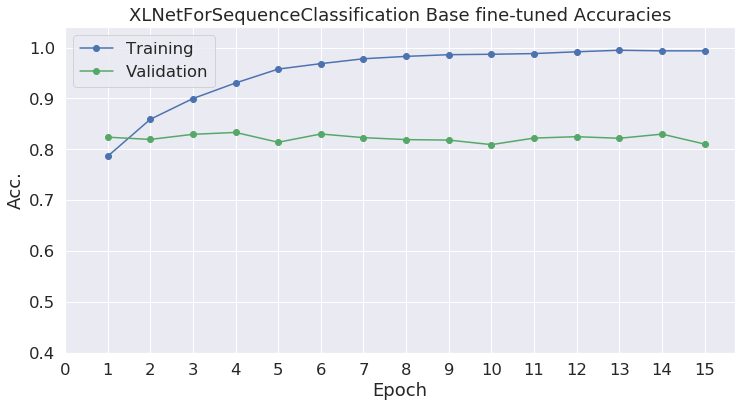

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
# plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
# plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.plot(df_stats['Training Accur.'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Accur.'], 'g-o', label="Validation")

# Label the plot.
# plt.title("Training & Validation Loss")
plt.title(f"{model._get_name()} Base {weights_state} Accuracies")
# plt.title(f"{model._get_name()} Large {weights_state} Accuracies")

# plt.title(f"{model._get_name()} Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Acc.")
plt.ylim(.4, 1.04)
plt.legend()
plt.xticks(range(epochs+1))#[1, 2, 3, 4])

plt.show()

# Fine Tune on optimism

In [24]:
import sys  
from shutil           import copyfile
sys.path.insert(0, '../')
# sys.path.insert(0, '../config/')

# from CustomTokenizer  import *
from data_preparation import *
# from Embedder         import *
# from models           import *
# from training         import *
# from set_project_seed import *


opt_data_path = "../../data/optimism-twitter-data/tweets_annotation.csv"

opt_tweets, opt_gold_labels = read_OPT_data(data_path=opt_data_path)
opt_gold_labels             = np.array(opt_gold_labels)
opt_tweets                  = np.array(opt_tweets)



SETTING_1M1 = True
# SETTING_1M1 = False

if SETTING_1M1:
        opt_tweets, opt_gold_labels = remove_vague_tweets(\
                                                                opt_tweets\
                                                              , opt_gold_labels)

bin_opt_gold_labels = binarize_labels(gold_labels=(opt_gold_labels)\
                                      , max_negative_value=0)

# x_train, y_train, x_dev, y_dev, x_test, y_test = \
#     train_dev_test_split(opt_vectorized_tweets\
#                          , bin_opt_gold_labels, R_SEED=16)

opt_tweets[-1], opt_gold_labels[-1], bin_opt_gold_labels[-1]

# Get the lists of sentences and their labels.
# sentences = df.sentence.values
# labels    = df.label.values
sentences = opt_tweets
labels    = np.where(opt_gold_labels<=0, 0, 1)

Processing text dataset:
Found 7,475 texts.

Removed tweets with AverageAnnotation in (-1, 1).
Binarized labels!


In [28]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

torch.manual_seed(10)

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

train_dataset.dataset.tensors[0][0][:10]

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Max sentence length:  69
Original:  did i just hear clive anderson say peter cooke is on the 'unreliable evidence' panel? excellent @bbcradio4
Token IDs: tensor([    5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
            5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
            5,     5,     5,     5,     5,     5,     5,     5,   190,    17,
          150,   125,  1388,  2349,  8032,    21,  9945,   248,  4566,   118,
         5314,    93,    27,    31,    18,    17,    26,  1264,    88,  1258,
          386,  1155,    26,  2570,    82,  2712,    17, 13304,  5914,  5302,
         9630,   265,     4,     3])
3,077 training samples
  770 validation samples


/home/stefan/anaconda3/envs/nlp-tf2/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [30]:
# model.parameters(), 

freeze = True
freeze = False

print(f"{model._get_name()} has {model.num_parameters():,} parameters.")
# for p in params[-2:]:
if freeze:
    for p in list(model.parameters())[:-4]:
    #     print(p.requires_grad)
        p.requires_grad = False
    print(f"\nFreezed {model._get_name()}\'s hidden layers weights.")
    
else:
    for p in model.parameters():
        p.requires_grad = True
    print(f"\n{model._get_name()}\'s ready for fine-tunning.")

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 15
        
        #     print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

# for p in list(model.parameters()):
#     print(p.requires_grad)
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

XLNetForSequenceClassification has 117,315,080 parameters.

XLNetForSequenceClassification's ready for fine-tunning.
The BERT model has 210 different named parameters.

==== Embedding Layer ====

transformer.mask_emb                                     (1, 1, 768)
transformer.word_embedding.weight                       (32000, 768)
transformer.layer.0.rel_attn.q                          (768, 12, 64)
transformer.layer.0.rel_attn.k                          (768, 12, 64)
transformer.layer.0.rel_attn.v                          (768, 12, 64)

==== First Transformer ====

transformer.layer.0.rel_attn.o                          (768, 12, 64)
transformer.layer.0.rel_attn.r                          (768, 12, 64)
transformer.layer.0.rel_attn.r_r_bias                       (12, 64)
transformer.layer.0.rel_attn.r_s_bias                       (12, 64)
transformer.layer.0.rel_attn.r_w_bias                       (12, 64)
transformer.layer.0.rel_attn.seg_embed                   (2, 12, 64)
transforme

In [32]:
#How to change last layer:
# https://discuss.pytorch.org/t/how-to-modify-the-final-fc-layer-based-on-the-torch-model/766/10

model.logits_proj = torch.nn.Linear(in_features=768\
                                    , out_features=np.unique(labels).shape[0])

# model

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0
    total_train_accuracy = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        
        if weight_decay:
            # Update the learning rate.
            scheduler.step()
        
        
        # Move logits and labels to CPU
        logits    = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_train_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)

        
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training Accuracy: {0:.4f}".format(avg_train_accuracy))
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Validation Accuracy: {0:.4f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Accur.': avg_train_accuracy,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [76]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

weights_state = "freezed" if freeze else "fine-tuned"

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])
df_stats.to_csv(f"../histories/BERT/{model._get_name()}_Base_ {weights_state}.csv")
# df_stats.to_csv(f"../histories/BERT/{model._get_name()}_Large_ {weights_state} .csv")


# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Accur.,Valid. Accur.,Training Time,Validation Time
epoch,,,,,,
1,0.4734,0.3941,0.7865,0.8241,0:00:32,0:00:02
2,0.3401,0.4513,0.8591,0.8197,0:00:32,0:00:02
3,0.2495,0.4531,0.8999,0.8297,0:00:32,0:00:02
4,0.1835,0.5832,0.9304,0.8334,0:00:32,0:00:02
5,0.1200,0.8957,0.9577,0.8141,0:00:32,0:00:02
6,0.0965,0.8605,0.9684,0.8303,0:00:32,0:00:02
7,0.0681,1.1148,0.9779,0.8232,0:00:32,0:00:02
8,0.0673,1.1542,0.9826,0.8193,0:00:32,0:00:02
9,0.0601,1.2160,0.9859,0.8184,0:00:32,0:00:02


# Additional

In [48]:
!pip install seaborn

     |████████████████████████████████| 215 kB 8.2 MB/s eta 0:00:01


In [52]:
df_stats.columns

Index(['Training Loss', 'Valid. Loss', 'Valid. Accur.', 'Training Time',
       'Validation Time'],
      dtype='object')

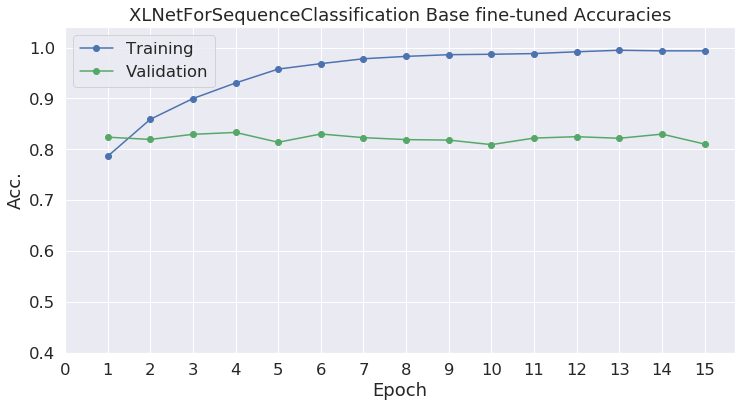

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
# plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
# plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.plot(df_stats['Training Accur.'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Accur.'], 'g-o', label="Validation")

# Label the plot.
# plt.title("Training & Validation Loss")
plt.title(f"{model._get_name()} Base {weights_state} Accuracies")
# plt.title(f"{model._get_name()} Large {weights_state} Accuracies")

# plt.title(f"{model._get_name()} Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Acc.")
plt.ylim(.4, 1.04)
plt.legend()
plt.xticks(range(epochs+1))#[1, 2, 3, 4])

plt.show()

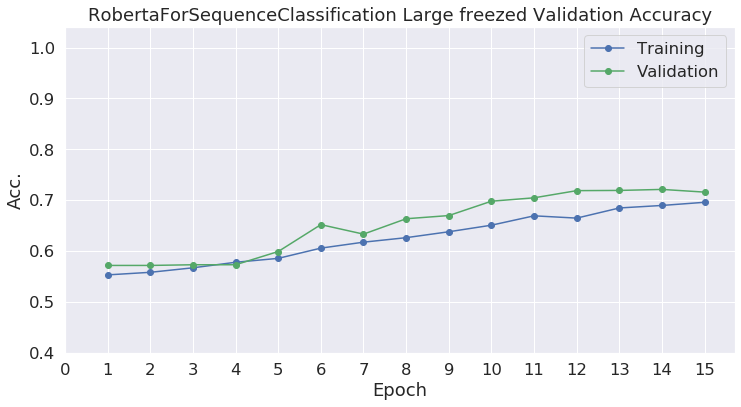

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
# plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
# plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.plot(df_stats['Training Accur.'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Accur.'], 'g-o', label="Validation")

# Label the plot.
# plt.title("Training & Validation Loss")
plt.title(f"{model._get_name()} Large freezed Validation Accuracy")
# plt.title(f"{model._get_name()} Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Acc.")
plt.ylim(.4, 1.04)
plt.legend()
plt.xticks(range(epochs+1))#[1, 2, 3, 4])

plt.show()

# 5. Performance On Test Set

Now we'll load the holdout dataset and prepare inputs just as we did with the training set. Then we'll evaluate predictions using [Matthew's correlation coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html) because this is the metric used by the wider NLP community to evaluate performance on CoLA. With this metric, +1 is the best score, and -1 is the worst score. This way, we can see how well we perform against the state of the art models for this specific task.

### 5.1. Data Preparation



We'll need to apply all of the same steps that we did for the training data to prepare our test data set.

In [0]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



## 5.2. Evaluate on Test Set



With the test set prepared, we can apply our fine-tuned model to generate predictions on the test set.

In [0]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 516 test sentences...
    DONE.


Accuracy on the CoLA benchmark is measured using the "[Matthews correlation coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)" (MCC).

We use MCC here because the classes are imbalanced:


In [0]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)


In [0]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


The final score will be based on the entire test set, but let's take a look at the scores on the individual batches to get a sense of the variability in the metric between batches. 

Each batch has 32 sentences in it, except the last batch which has only (516 % 32) = 4 test sentences in it.


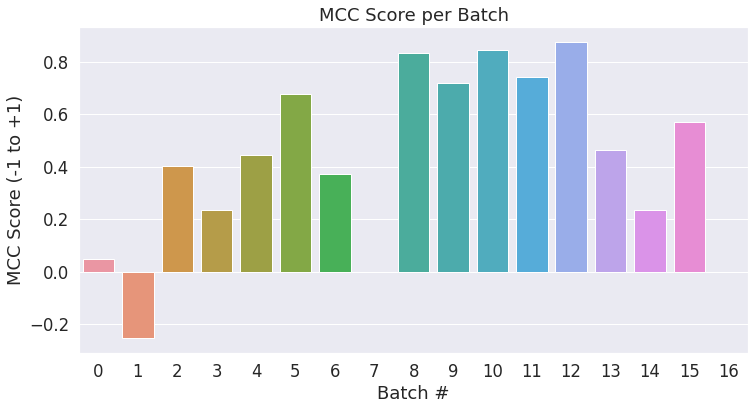

In [0]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

Now we'll combine the results for all of the batches and calculate our final MCC score.

In [0]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.498


Cool! In about half an hour and without doing any hyperparameter tuning (adjusting the learning rate, epochs, batch size, ADAM properties, etc.) we are able to get a good score. 

> *Note: To maximize the score, we should remove the "validation set" (which we used to help determine how many epochs to train for) and train on the entire training set.*

The library documents the expected accuracy for this benchmark [here](https://huggingface.co/transformers/examples.html#glue) as `49.23`.

You can also look at the official leaderboard [here](https://gluebenchmark.com/leaderboard/submission/zlssuBTm5XRs0aSKbFYGVIVdvbj1/-LhijX9VVmvJcvzKymxy). 

Note that (due to the small dataset size?) the accuracy can vary significantly between runs.


# Conclusion

This post demonstrates that with a pre-trained BERT model you can quickly and effectively create a high quality model with minimal effort and training time using the pytorch interface, regardless of the specific NLP task you are interested in.

# Appendix


## A1. Saving & Loading Fine-Tuned Model

This first cell (taken from `run_glue.py` [here](https://github.com/huggingface/transformers/blob/35ff345fc9df9e777b27903f11fa213e4052595b/examples/run_glue.py#L495)) writes the model and tokenizer out to disk.

In [0]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/vocab.txt',
 './model_save/special_tokens_map.json',
 './model_save/added_tokens.json')

Let's check out the file sizes, out of curiosity.

In [0]:
!ls -l --block-size=K ./model_save/

total 427960K
-rw-r--r-- 1 root root      2K Mar 18 15:53 config.json
-rw-r--r-- 1 root root 427719K Mar 18 15:53 pytorch_model.bin
-rw-r--r-- 1 root root      1K Mar 18 15:53 special_tokens_map.json
-rw-r--r-- 1 root root      1K Mar 18 15:53 tokenizer_config.json
-rw-r--r-- 1 root root    227K Mar 18 15:53 vocab.txt


The largest file is the model weights, at around 418 megabytes.

In [0]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

-rw-r--r-- 1 root root 418M Mar 18 15:53 ./model_save/pytorch_model.bin


To save your model across Colab Notebook sessions, download it to your local machine, or ideally copy it to your Google Drive.

In [0]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
    drive.mount('/content/drive')

In [0]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ "./drive/Shared drives/ChrisMcCormick.AI/Blog Posts/BERT Fine-Tuning/"

The following functions will load the model back from disk.

In [0]:
# Load a trained model and vocabulary that you have fine-tuned
model = model_class.from_pretrained(output_dir)
tokenizer = tokenizer_class.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

## A.2. Weight Decay



The huggingface example includes the following code block for enabling weight decay, but the default decay rate is "0.0", so I moved this to the appendix.

This block essentially tells the optimizer to not apply weight decay to the bias terms (e.g., $ b $ in the equation $ y = Wx + b $ ). Weight decay is a form of regularization--after calculating the gradients, we multiply them by, e.g., 0.99.

In [0]:
# This code is taken from:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L102

# Don't apply weight decay to any parameters whose names include these tokens.
# (Here, the BERT doesn't have `gamma` or `beta` parameters, only `bias` terms)
no_decay = ['bias', 'LayerNorm.weight']

# Separate the `weight` parameters from the `bias` parameters. 
# - For the `weight` parameters, this specifies a 'weight_decay_rate' of 0.01. 
# - For the `bias` parameters, the 'weight_decay_rate' is 0.0. 
optimizer_grouped_parameters = [
    # Filter for all parameters which *don't* include 'bias', 'gamma', 'beta'.
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.1},
    
    # Filter for parameters which *do* include those.
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

# Note - `optimizer_grouped_parameters` only includes the parameter values, not 
# the names.

# Revision History

**Version 3** - *Mar 18th, 2020* - (current)
* Simplified the tokenization and input formatting (for both training and test) by leveraging the `tokenizer.encode_plus` function. 
`encode_plus` handles padding *and* creates the attention masks for us.
* Improved explanation of attention masks.
* Switched to using `torch.utils.data.random_split` for creating the training-validation split.
* Added a summary table of the training statistics (validation loss, time per epoch, etc.).
* Added validation loss to the learning curve plot, so we can see if we're overfitting. 
    * Thank you to [Stas Bekman](https://ca.linkedin.com/in/stasbekman) for contributing this!
* Displayed the per-batch MCC as a bar plot.

**Version 2** - *Dec 20th, 2019* - [link](https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP)
* huggingface renamed their library to `transformers`. 
* Updated the notebook to use the `transformers` library.

**Version 1** - *July 22nd, 2019*
* Initial version.

## Further Work

* It might make more sense to use the MCC score for “validation accuracy”, but I’ve left it out so as not to have to explain it earlier in the Notebook.
* Seeding -- I’m not convinced that setting the seed values at the beginning of the training loop is actually creating reproducible results…
* The MCC score seems to vary substantially across different runs. It would be interesting to run this example a number of times and show the variance.
